**FINAL PROJECT 4 : CLUSTERING**

**KELOMPOK 7**
1. Riko Fajarudin PYTN-KS10-023
2. Mochamad Raffli Ispriyanto PYTN-KS10-022

**PROJECT OVERVIEW**

Data ini bernama Credit Card Dataset for Clustering yang diperoleh dari https://www.kaggle.com/arjunbhasin2013/ccdata. Kasus ini membutuhkan untuk mengembangkan segmentasi pelanggan untuk menentukan strategi pemasaran. Dataset ini memiliki dimensi yang tinggi dan variabel-variabel yang berkorelasi. Data ini berisi transaksi pengguna kartu kredit sebanyak 8949 orang selama 6 bulan, dataset kartu kredit ini memiliki 18 atribut.

Informasi Atribut :
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

**IMPORT LIBRARY**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

**DATA LOADING**

In [41]:
df = pd.read_csv('credit.zip')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [44]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Pada data diatas terdapat missing value di kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS. Maka selanjutnya akan dilakukan Cleaning untuk menghilangkan Missing value

**DATA CLEANING**

In [45]:
missing_value_col = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']

for col in missing_value_col:
    df.loc[df[col].isna()==True,col] = df[col].mean()
df.isna().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Pada dataset diatas sudah tidak ditemukan missing value

In [46]:
df.drop(['CUST_ID', 
         'BALANCE',
         'PURCHASES', 
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'PAYMENTS', 
         'MINIMUM_PAYMENTS'],axis=1,inplace=True)
df

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,0.000000,12
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,0.222222,12
2,1.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,0.000000,12
3,0.636364,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,12
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,0.000000,12
...,...,...,...,...,...,...,...,...,...,...
8945,1.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,0.500000,6
8946,1.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,0.000000,6
8947,0.833333,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,0.250000,6
8948,0.833333,0.000000,0.000000,0.000000,0.166667,2,0,500.0,0.250000,6


Menghapus kolom CUST_ID karena tidak digunakan pada projek ini

**EKSPLORASI DATA ANALISIS**

In [47]:
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

In [48]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.877271,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,0.153715,11.517318
std,0.236904,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,6.000000
25%,0.888889,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,0.000000,12.000000
50%,1.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,0.000000,12.000000
75%,1.000000,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,0.142857,12.000000
max,1.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,1.000000,12.000000


Memisahkan kolom dengan tipe data numerical

In [49]:
num_col = (df.columns).to_list()

Menampilkan displot untuk num_col

In [50]:
# plt.figure(figsize=(15,10))
# for i in enumerate(num_col):
#     plt.subplot(5,2,i[0]+1)
#     sns.distplot(df[i[1]])

Melihat Korelasi atau Hubungan antar Kolom

In [51]:
df.corr()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
BALANCE_FREQUENCY,1.000000,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,-0.095082,0.119776
PURCHASES_FREQUENCY,0.229715,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.202415,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,0.176079,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.191873,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,-0.249773,-0.133372
CASH_ADVANCE_TRX,0.141555,-0.203478,-0.069088,-0.169207,0.799561,1.000000,-0.066157,0.149699,-0.169784,-0.043421
PURCHASES_TRX,0.189626,0.568430,0.544869,0.529975,-0.131168,-0.066157,1.000000,0.272877,0.162066,0.121874
CREDIT_LIMIT,0.095795,0.119778,0.295030,0.060752,0.132616,0.149699,0.272877,1.000000,0.055671,0.139034
PRC_FULL_PAYMENT,-0.095082,0.305802,0.157531,0.250087,-0.249773,-0.169784,0.162066,0.055671,1.000000,-0.016486
TENURE,0.119776,0.061506,0.082466,0.073275,-0.133372,-0.043421,0.121874,0.139034,-0.016486,1.000000


Melihat korelasi antar kolom dalam bentuk heatmap

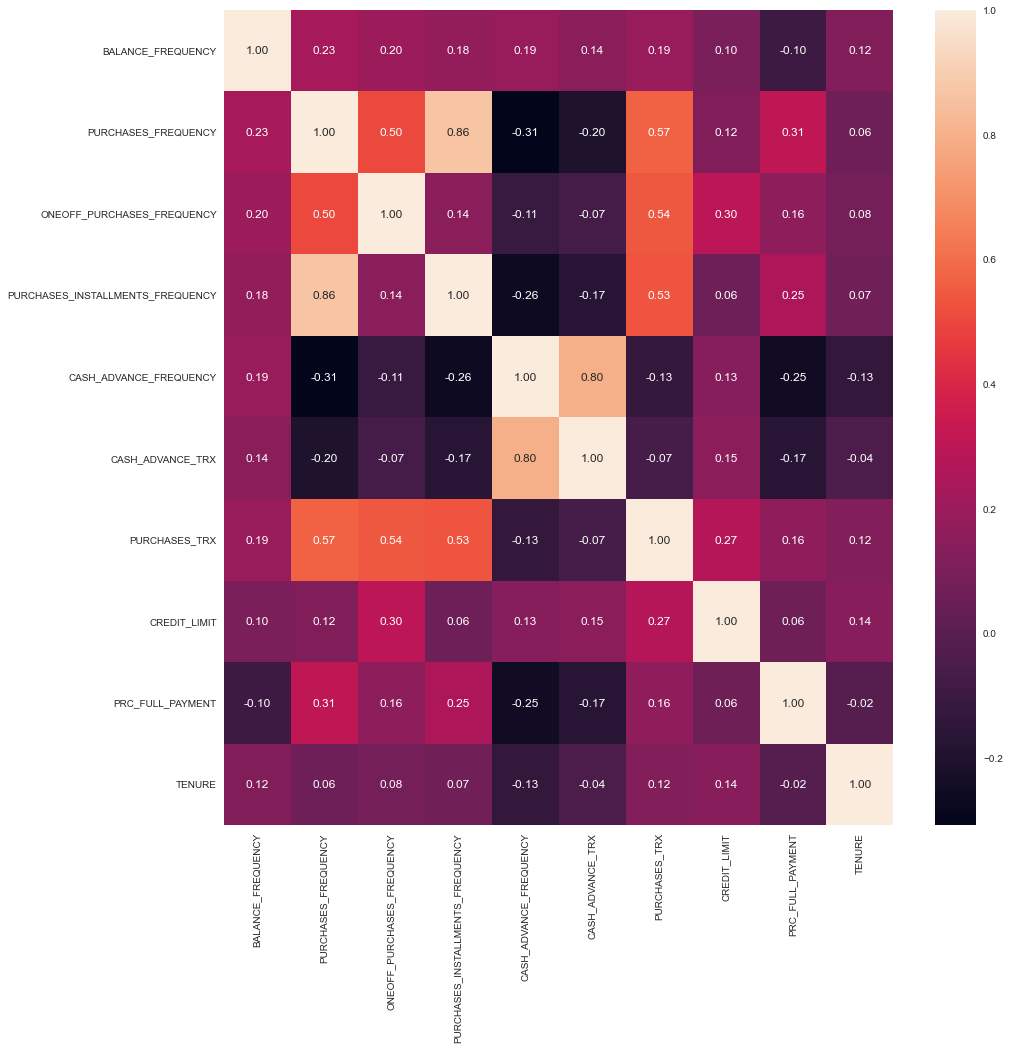

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

 Outliers Handling

Mendeteksi outliers dengan menggunakan boxplot

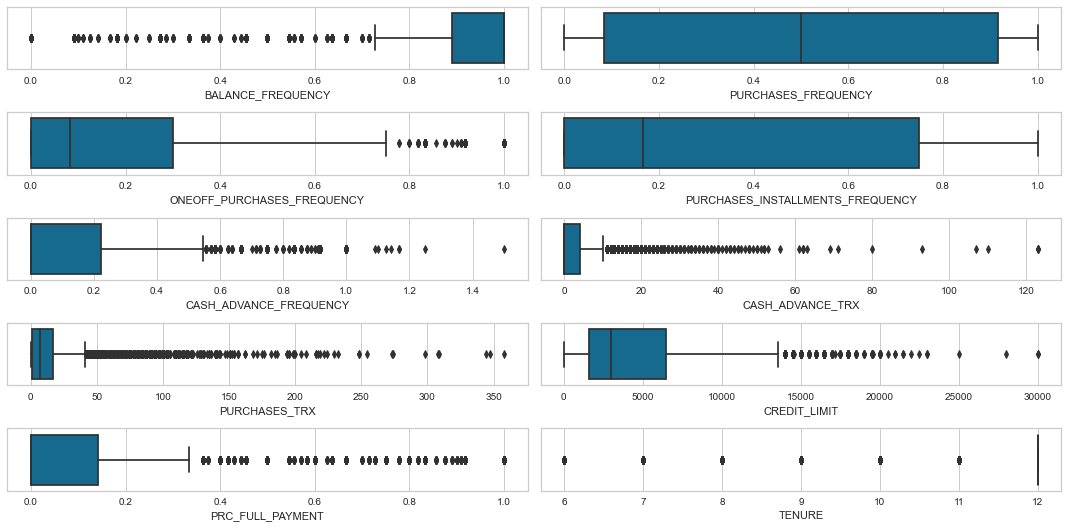

In [53]:
fig, axs = plt.subplots(5,2, figsize = (15,7.5))
plt1 = sns.boxplot(df['BALANCE_FREQUENCY'], ax = axs[0,0])
plt2 = sns.boxplot(df['PURCHASES_FREQUENCY'], ax = axs[0,1])
plt3 = sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'], ax = axs[1,0])
plt4 = sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax = axs[1,1])
plt5 = sns.boxplot(df['CASH_ADVANCE_FREQUENCY'], ax = axs[2,0])
plt6 = sns.boxplot(df['CASH_ADVANCE_TRX'], ax = axs[2,1])
plt7 = sns.boxplot(df['PURCHASES_TRX'], ax = axs[3,0])
plt8 = sns.boxplot(df['CREDIT_LIMIT'], ax = axs[3,1])
plt9 = sns.boxplot(df['PRC_FULL_PAYMENT'], ax = axs[4,0])
plt10 = sns.boxplot(df['TENURE'], ax = axs[4,1])

plt.tight_layout()

In [54]:
df2 = df.copy()
df2.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,0.000000,12
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,0.222222,12
2,1.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,0.000000,12
3,0.636364,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,12
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,0.000000,12


Membuat fungsi outliers untuk mengatasi outliers

In [55]:
def outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(df)):
      if df[column].iloc[i] > upper_bound:
          df[column].iloc[i] = upper_bound
      if df[column].iloc[i] < lower_bound:
          df[column].iloc[i] = lower_bound

for feature in num_col:
  outliers(df, feature)

Boxplot setelah penanganan outlier

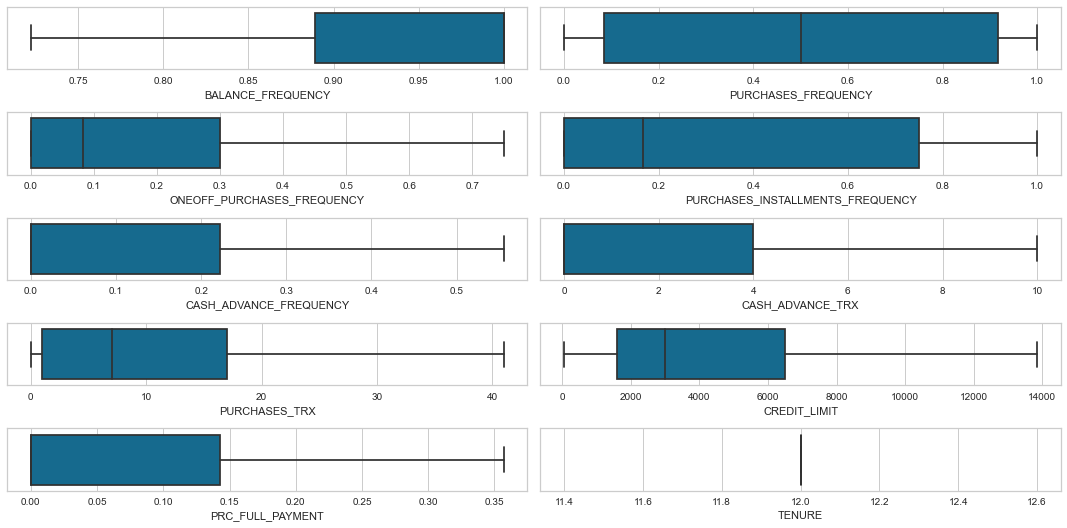

In [56]:
fig, axs = plt.subplots(5,2, figsize = (15,7.5))
plt1 = sns.boxplot(df['BALANCE_FREQUENCY'], ax = axs[0,0])
plt2 = sns.boxplot(df['PURCHASES_FREQUENCY'], ax = axs[0,1])
plt3 = sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'], ax = axs[1,0])
plt4 = sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], ax = axs[1,1])
plt5 = sns.boxplot(df['CASH_ADVANCE_FREQUENCY'], ax = axs[2,0])
plt6 = sns.boxplot(df['CASH_ADVANCE_TRX'], ax = axs[2,1])
plt7 = sns.boxplot(df['PURCHASES_TRX'], ax = axs[3,0])
plt8 = sns.boxplot(df['CREDIT_LIMIT'], ax = axs[3,1])
plt9 = sns.boxplot(df['PRC_FULL_PAYMENT'], ax = axs[4,0])
plt9 = sns.boxplot(df['TENURE'], ax = axs[4,1])

plt.tight_layout()

**DATA PREPROCESSING**

Scaling

In [57]:
train_df, test_df = train_test_split(df,test_size=0.2,random_state=42)

In [58]:
train_df

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
7055,0.777778,0.777778,0.444444,0.666667,0.000000,0,14,2500.0,0.000000,12
4580,1.000000,0.000000,0.000000,0.000000,0.083333,1,0,6500.0,0.000000,12
8545,1.000000,0.000000,0.000000,0.000000,0.555555,10,0,1000.0,0.357143,12
4463,0.722223,0.916667,0.083333,0.833333,0.000000,0,12,2000.0,0.000000,12
5705,1.000000,0.083333,0.083333,0.000000,0.250000,6,1,6000.0,0.000000,12
...,...,...,...,...,...,...,...,...,...,...
5734,1.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,0.000000,12
5191,1.000000,0.000000,0.000000,0.000000,0.333333,8,0,2500.0,0.000000,12
5390,0.722223,0.000000,0.000000,0.000000,0.083333,2,0,1500.0,0.357143,12
860,0.722223,0.750000,0.000000,0.750000,0.000000,0,14,4000.0,0.000000,12


In [59]:
scaling = StandardScaler()
scaling.fit(df)
scaling_df = pd.DataFrame(scaling.transform(df),columns= df.columns )

Normalisasi Value

In [61]:
x = df.values #mengembalikan sebuah numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.34545455, 0.166667  , 0.        , 0.083333  , 0.        ,
        0.        , 0.04878049, 0.06884058, 0.        , 0.        ],
       [0.67272727, 0.        , 0.        , 0.        , 0.45000045,
        0.4       , 0.        , 0.50362319, 0.62222222, 0.        ],
       [1.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.29268293, 0.53985507, 0.        , 0.        ],
       [0.        , 0.083333  , 0.11111067, 0.        , 0.14999955,
        0.1       , 0.02439024, 0.53985507, 0.        , 0.        ],
       [1.        , 0.083333  , 0.11111067, 0.        , 0.        ,
        0.        , 0.02439024, 0.08333333, 0.        , 0.        ]])

MODELLING

In [68]:
pca = PCA(n_components=2)
pca.fit(scaling_df)
PCA_ds = pd.DataFrame(pca.transform(scaling_df), columns=(["Principal Component 1", "Principal Component 2"]))
PCA_ds.head()

,Principal Component 1,Principal Component 2
0,-1.185026,-1.885260
1,-1.728900,-0.018756
2,1.370034,0.620095
3,-1.445083,-1.169444
4,-1.153257,-1.161423


In [69]:
pca.explained_variance_ratio_


array([0.37956128, 0.22152604])

Metode diatas digunakan untuk mendapatkan rasio varians. Jadi pada PCA 1 itu memiliki nilai varians sebanyak 33% dari 100%, dan PCA 2 memiliki nilai 25% dari 100%. Sehingga jika di jumlahkan keduanya memiliki sekitar 59% dari 100%.

CLUSTERING

pengelompokan melalui elbow method

Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk :


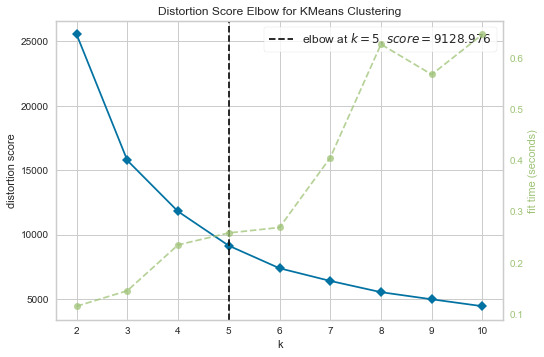

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
print('Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk :')
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(PCA_ds)
Elb.show()

Berdasarkan visualisasi elbow method, Nilai K paling optimal adalah 5. Dengan begitu, jumlah cluster terbentuk sebanyak 5

In [71]:
X = scaling_df

In [72]:
kmeans= KMeans(n_clusters=5, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)

In [73]:
kmeans.fit(X)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(5, 10)

Terdapat 5 klaster pada 10 atribut yang digunakan

EVALUASI MDDEL

In [74]:
# Mencari nilai rata-rata setiap cluster
cls_avg = pd.DataFrame(data = kmeans.cluster_centers_, columns = [scaling_df.columns])
cls_avg

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,0.475574,1.076828,1.790654,0.565151,-0.314000,-0.300525,1.480053,0.685293,0.319862,0.0
1,-1.786666,-0.556738,-0.379670,-0.488410,-0.482478,-0.478988,-0.556944,-0.173211,0.340641,0.0
2,0.316196,-0.675294,-0.344056,-0.584977,1.724550,1.793573,-0.543032,0.295145,-0.420913,0.0
3,0.528595,-0.797459,-0.353013,-0.724255,-0.174446,-0.252665,-0.660204,-0.273367,-0.523495,0.0
4,0.291220,1.055485,-0.479718,1.265904,-0.538891,-0.520389,0.451439,-0.352646,0.383223,0.0


In [75]:
# Lakukan invers pada data yang telah di standarisasi untuk memahami karakter dari data dan setiap kolom
cls_avg_invers = scaling.inverse_transform(cls_avg)
cls_avg_invers = pd.DataFrame(data = cls_avg,columns = [scaling_df.columns])
cls_avg_invers

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE
0,0.475574,1.076828,1.790654,0.565151,-0.314000,-0.300525,1.480053,0.685293,0.319862,0.0
1,-1.786666,-0.556738,-0.379670,-0.488410,-0.482478,-0.478988,-0.556944,-0.173211,0.340641,0.0
2,0.316196,-0.675294,-0.344056,-0.584977,1.724550,1.793573,-0.543032,0.295145,-0.420913,0.0
3,0.528595,-0.797459,-0.353013,-0.724255,-0.174446,-0.252665,-0.660204,-0.273367,-0.523495,0.0
4,0.291220,1.055485,-0.479718,1.265904,-0.538891,-0.520389,0.451439,-0.352646,0.383223,0.0


In [76]:
# Menambahkan kolom cluster pada dataframe
df_clusters = pd.concat([scaling_df, pd.DataFrame({'cluster':labels})], axis=1)
df_clusters.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,cluster
0,-1.021875,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010562,-0.629277,0.0,1
1,-0.202708,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762715,0.973961,0.0,3
2,0.616459,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910488,-0.629277,0.0,0
3,-1.886552,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910488,-0.629277,0.0,1
4,0.616459,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951453,-0.629277,0.0,3


Distribusi frekuensi setiap atribut berdasarkan cluster

CLUSTER 0

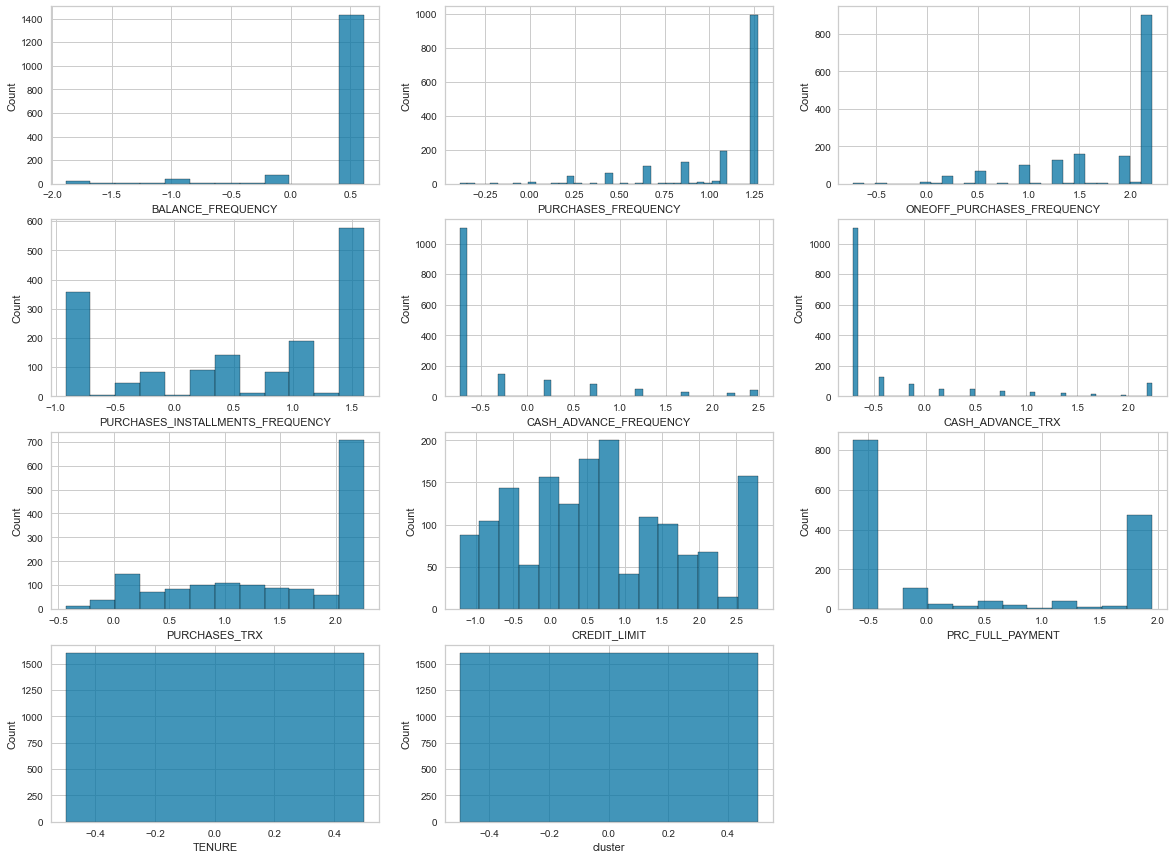

In [77]:
df_clusters0 = df_clusters[(df_clusters['cluster'] == 0)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters0):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters0[i[1]])

CLUSTER 1

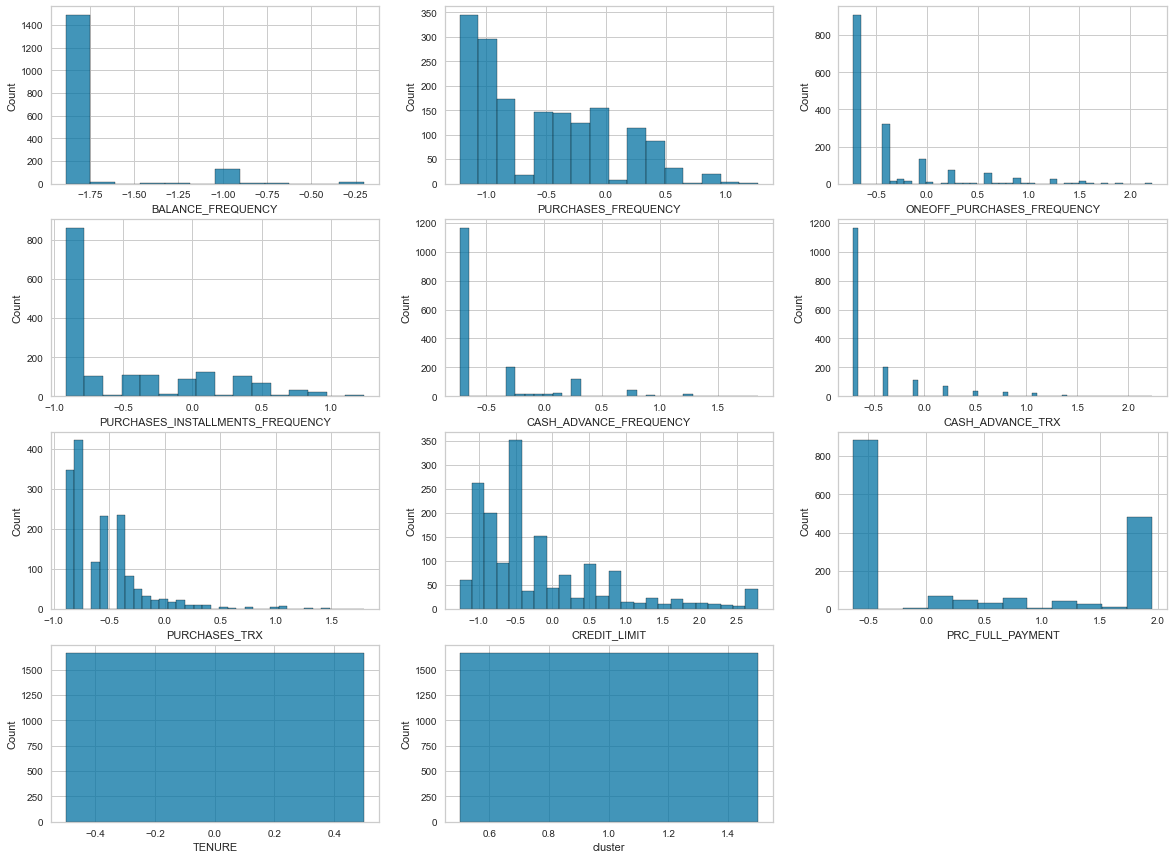

In [78]:
df_clusters1 = df_clusters[(df_clusters['cluster'] == 1)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters1):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters1[i[1]])

CLUSTER 2

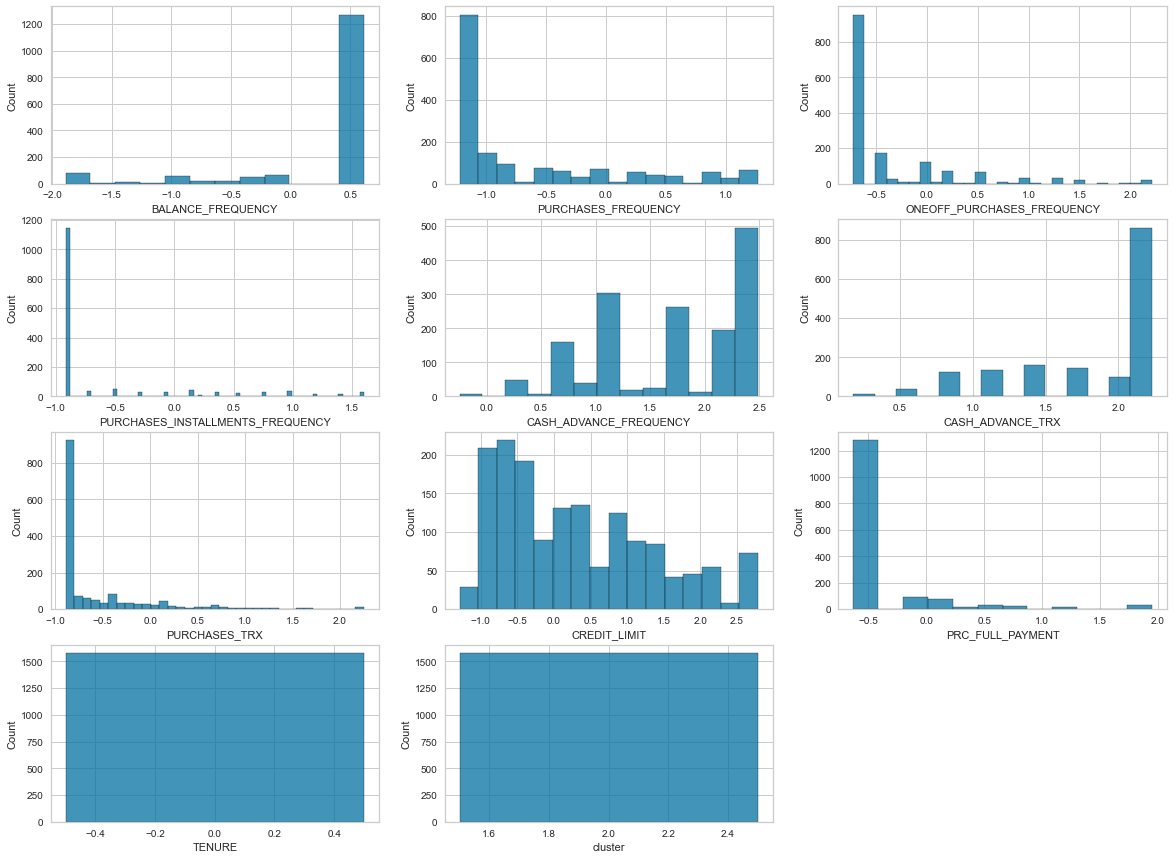

In [79]:
df_clusters2 = df_clusters[(df_clusters['cluster'] == 2)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters2):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters2[i[1]])

CLUSTER 3

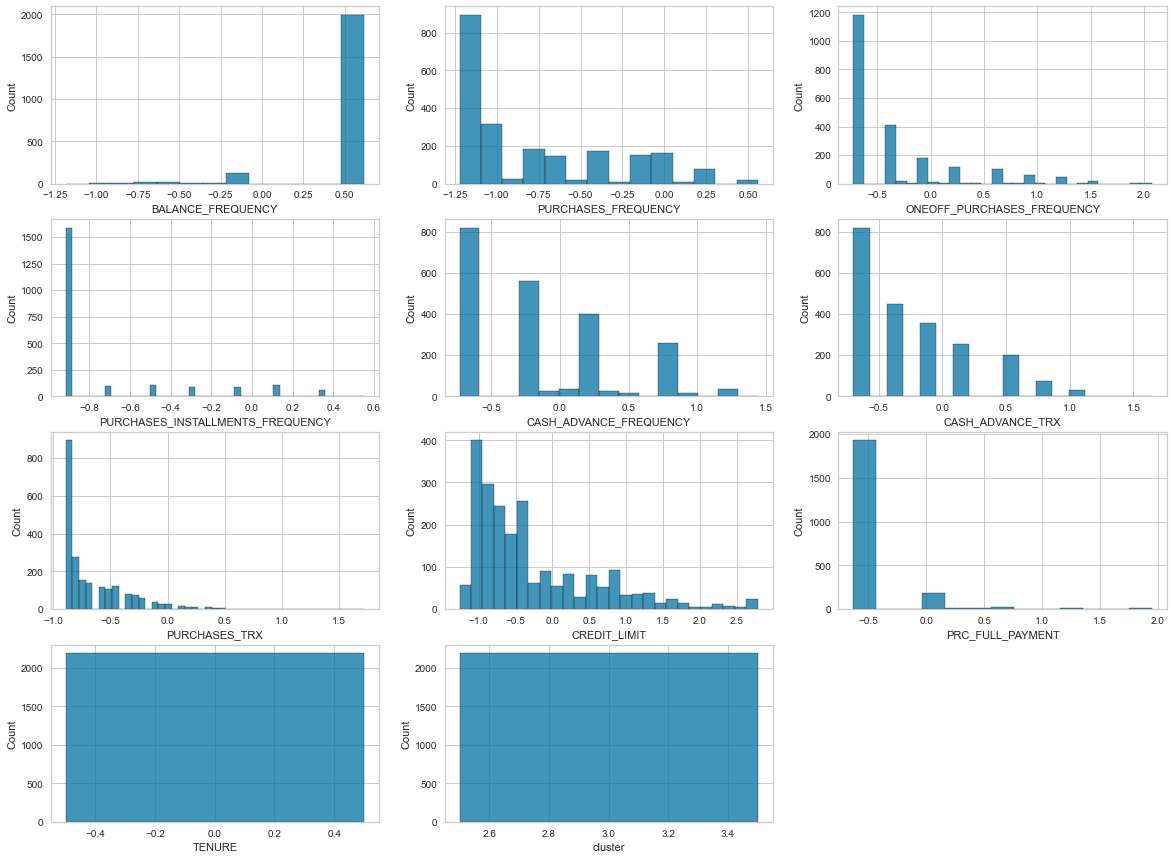

In [80]:
df_clusters3 = df_clusters[(df_clusters['cluster'] == 3)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters3):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters3[i[1]])

CLUSTER 4

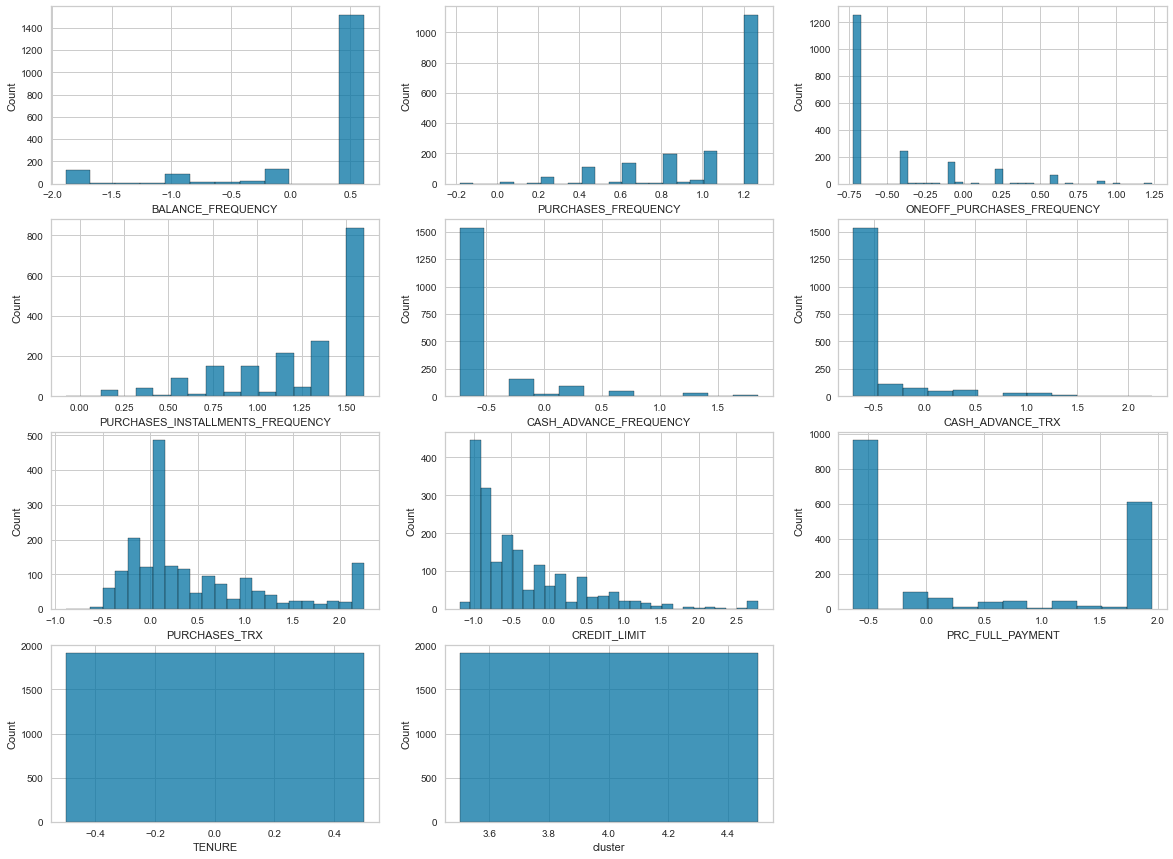

In [81]:
df_clusters4 = df_clusters[(df_clusters['cluster'] == 4)]
plt.figure(figsize=(20,15))

for i in enumerate(df_clusters4):
    plt.subplot(4,3 ,i[0]+1)
    sns.histplot(df_clusters4[i[1]])

In [82]:
# Jumlah setiap cluster
cluster_count = df_clusters['cluster'].value_counts().sort_values(ascending=False)
cluster_count

3    2194
4    1912
1    1666
0    1601
2    1577
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

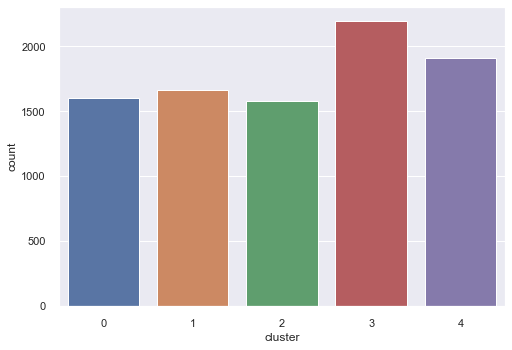

In [83]:
sns.set_theme(style="darkgrid")
sns.countplot(x="cluster", data=df_clusters)

In [84]:
# Menambahkan kolom klaster dengan mengambil data dari labels

PCA_ds['Cluster'] = labels
PCA_ds.head()

,Principal Component 1,Principal Component 2,Cluster
0,-1.185026,-1.885260,1
1,-1.728900,-0.018756,3
2,1.370034,0.620095,0
3,-1.445083,-1.169444,1
4,-1.153257,-1.161423,3


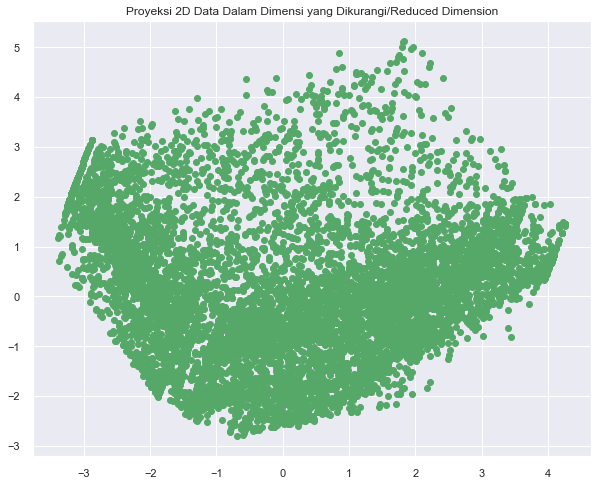

In [85]:
# Proyeksi 2D Data Dalam Dimensi yang Dikurangi/Reduced Dimension
x = PCA_ds["Principal Component 1"]
y = PCA_ds["Principal Component 2"]

# plotting
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c='g' , marker="o" )
ax.set_title("Proyeksi 2D Data Dalam Dimensi yang Dikurangi/Reduced Dimension")
plt.show()

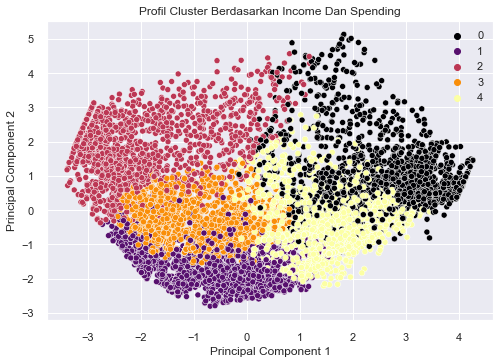

In [86]:
pl = sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue = "Cluster", data = PCA_ds, palette='inferno')
pl.set_title("Profil Cluster Berdasarkan Income Dan Spending")
plt.legend()
plt.show()

Plot diatas berbeda dengan plot 2D sebelumnya, karena pada scatter plot ini setiap cluster dipetakan pada proykesi 2D dan memiliki warna yang berbeda. Sehingga, kita lebih mudah untuk melihat persebaran cluster dan melakukan analisisnya

MODEL INFERENCE

In [87]:
df_clusters.head()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,cluster
0,-1.021875,-0.806490,-0.722749,-0.707313,-0.730084,-0.697293,-0.737970,-1.010562,-0.629277,0.0,1
1,-0.202708,-1.221758,-0.722749,-0.916995,0.717792,0.473089,-0.891333,0.762715,0.973961,0.0,3
2,0.616459,1.269843,2.210909,-0.916995,-0.730084,-0.697293,0.028848,0.910488,-0.629277,0.0,0
3,-1.886552,-1.014125,-0.396788,-0.916995,-0.247460,-0.404697,-0.814651,0.910488,-0.629277,0.0,1
4,0.616459,-1.014125,-0.396788,-0.916995,-0.730084,-0.697293,-0.814651,-0.951453,-0.629277,0.0,3


Karena df_cluster memiliki nilai data yang telah di scaling, selanjutnya kami hanya mengambil data pada kolom clusternya untuk dimasukan ke dalam data df.

In [88]:
col_clus = df_clusters['cluster']
cc = pd.DataFrame(data=col_clus)
cc.head()

,cluster
0,1
1,3
2,0
3,1
4,3


In [89]:
df.shape

(8950, 10)

In [90]:
df['Cluster'] = cc
df

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT,TENURE,Cluster
0,0.818182,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,0.000000,12,1
1,0.909091,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,0.222222,12,3
2,1.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,0.000000,12,0
3,0.722223,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,12,1
4,1.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...
8945,1.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,0.357143,12,4
8946,1.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,0.000000,12,4
8947,0.833333,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,0.250000,12,4
8948,0.833333,0.000000,0.000000,0.000000,0.166667,2,0,500.0,0.250000,12,1


Tabel diatas adalah data asli yang ditambahkan data kolom cluster. Selanjutnya, data asli tersebut akan kami jadikan sebagai input pengujian

Untuk pengujian misalnya kita memasukan data pada baris 1 atau index ke 0

**CONCLUSION**

Berdasarkan hasil analisis keseluruhan, dapat disimpulkan bahwa:

1. Project ini membahas tentang mengimplementasikan algoritme Unsupervised Learning. Metode yang digunakan untuk menyelesaikan permasalahannya adalah Principal Component Analysis (PCA) dan K-Means. PCA digunakan untuk mereduksi atau mengurangi jumlah dimensi. Sedangkan K-Means digunakan untuk tahap clusteringnya.
2. Teknik ELBOW METHOD digunakan untuk mencari nilai optimal dalam menentukan jumlah clustering. Diperoleh jumlah Cluster paling optimal, yaitu lima.
3. Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan berdasarkan lima Clustering, dimana kelima cluster tersebut memiliki kriteria yang berbeda. Yaitu :
* Pengguna lebih sering memperbaharui isi saldo, melakukan pembelian dan transaksi pembayaran, sehingga limit kreditnya kecil
* Pengguna sangat jarang memperbaharui isi saldo, tidak sering melakukan transaksi pembelian dan memiliki limit kredit rata-rata
* pengguna cukup sering memperbaharui isi saldo, memiliki jumlah pembelian paling tinggi, sering melakukan transaksi pembelian, memiliki rata-rata jumlah transaksi dengan cash in advance, memiliki jumlah transaksi pembelian cukup tinggi dan memiliki limit kredit seimbang.
* pengguna sangat sering memperbaharui isi saldo, jumlah pembelian yang tidak terlalu tinggi, tidak sering melakukan pembelian, jumlah transaksi cukup tinggi, jumlah pembayaran yang dilakukan pengguna cukup sering, dan limit kredit pengguna sangat tinggi
* pengguna cukup sering memperbaharui isi saldo, jumlah pembelian sangat tinggi, frekuensi pembelian sering dilakukan, jumlah transaksi pembelian sangat tinggi, jumlah pembayaran yang dilakukan pengguna cukup tinggi, dan limit kredit pengguna sangat tinggi, dan limit kredit pengguna cukup tinggi.
* Dengan menggunakan PCA menghasilkan 2 komponen utama, dimana kedua komponen tersebut jika di totalkan memiliki nilai varians dari data sebesar 47%.